In [11]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
df['class'].unique()

array(['p', 'e'], dtype=object)

Poisonous & Edible are the unique values in the column

In [7]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

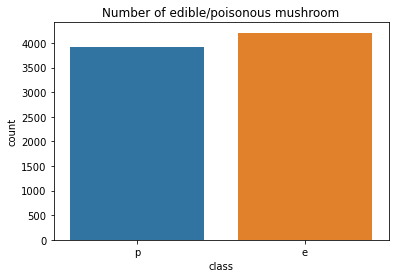

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='class',data=df)
plt.title('Number of edible/poisonous mushroom')
plt.show()

In [9]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

    Label Encoder will needed to change the objects to numeric

In [10]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [12]:
le=LabelEncoder()
columns=df.columns
for i in df.columns:
    df[i]=le.fit_transform(df[i])
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [13]:
df['veil-type'].unique()

array([0])

In [14]:
df.drop('veil-type',axis=1,inplace=True)

In [15]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<AxesSubplot:>

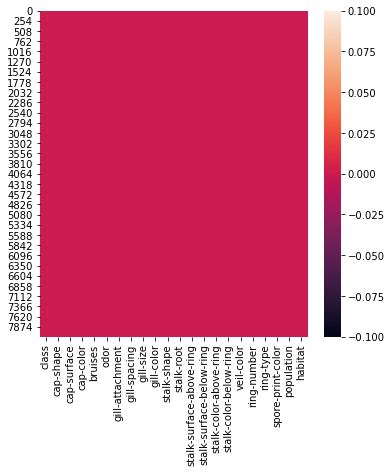

In [18]:
plt.figure(figsize=(6,6))
sns.heatmap(df.isnull())

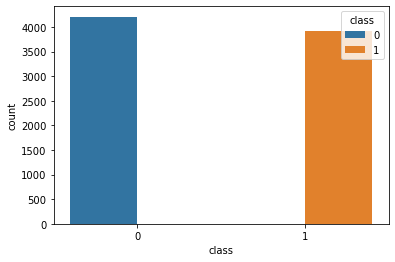

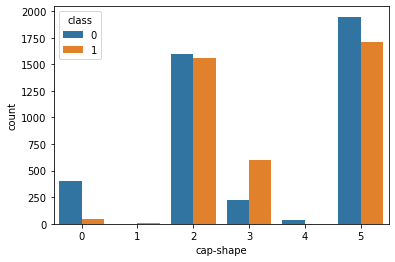

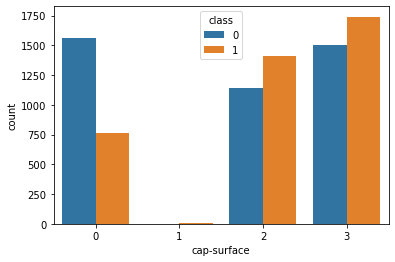

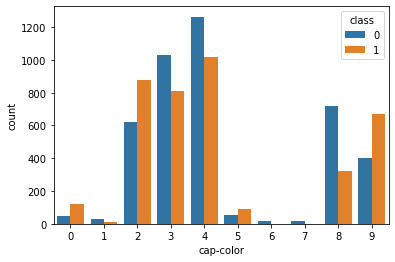

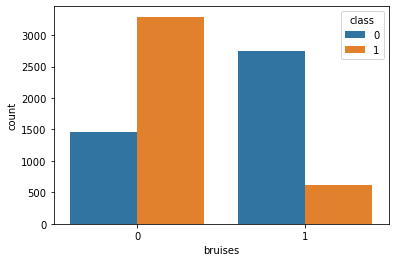

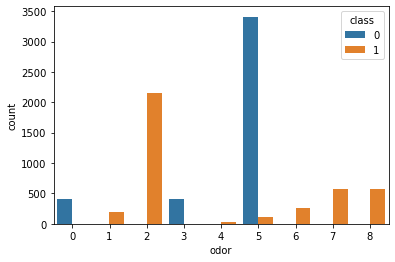

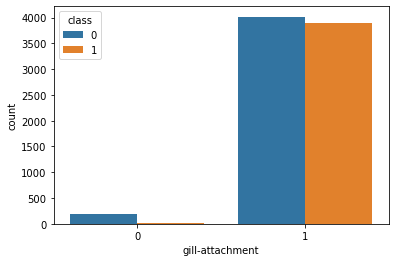

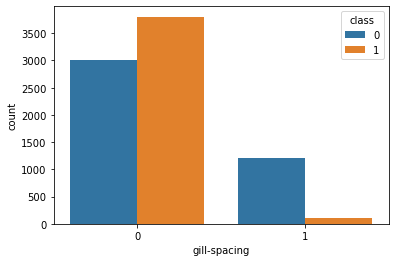

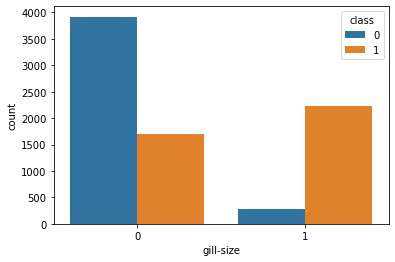

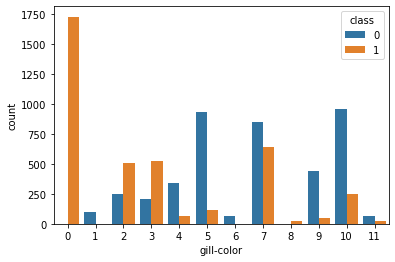

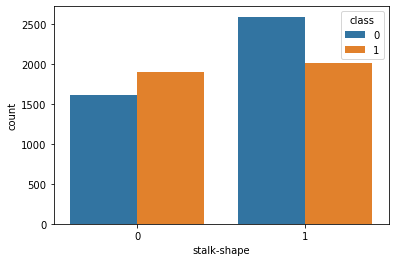

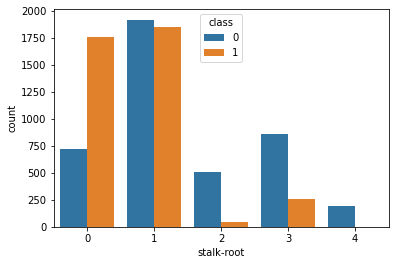

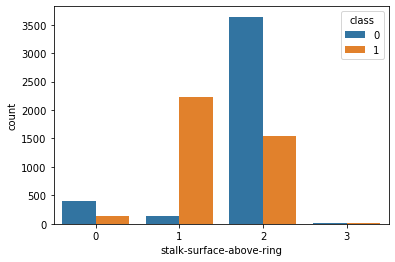

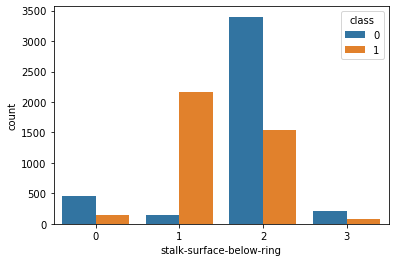

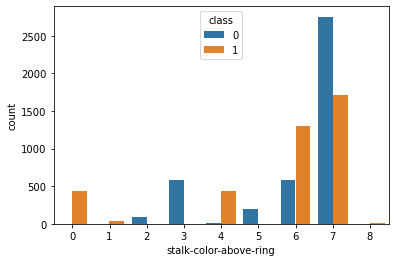

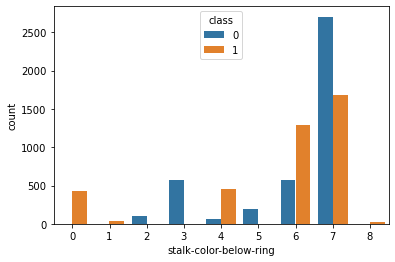

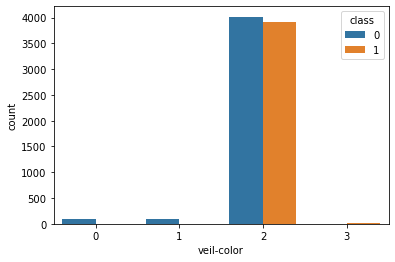

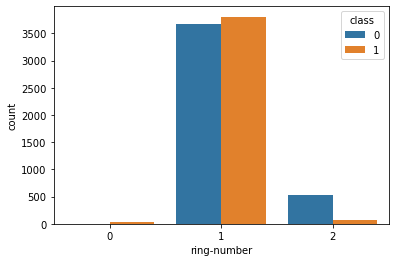

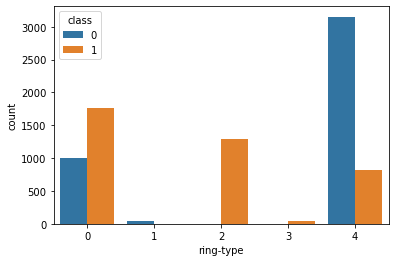

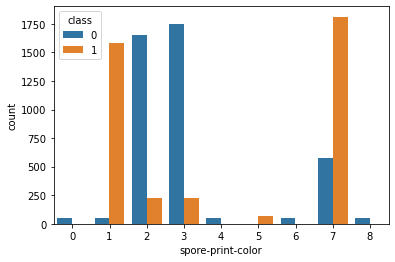

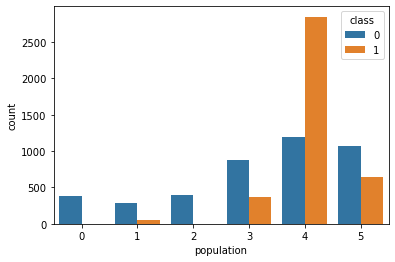

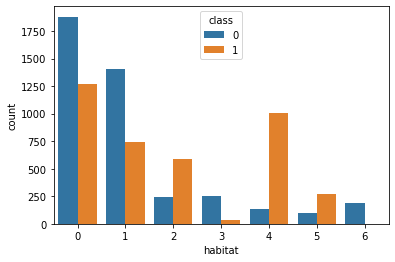

In [17]:
for col in df.columns:
    sns.countplot(col,data=df,hue=df['class'])
    plt.show()

<AxesSubplot:>

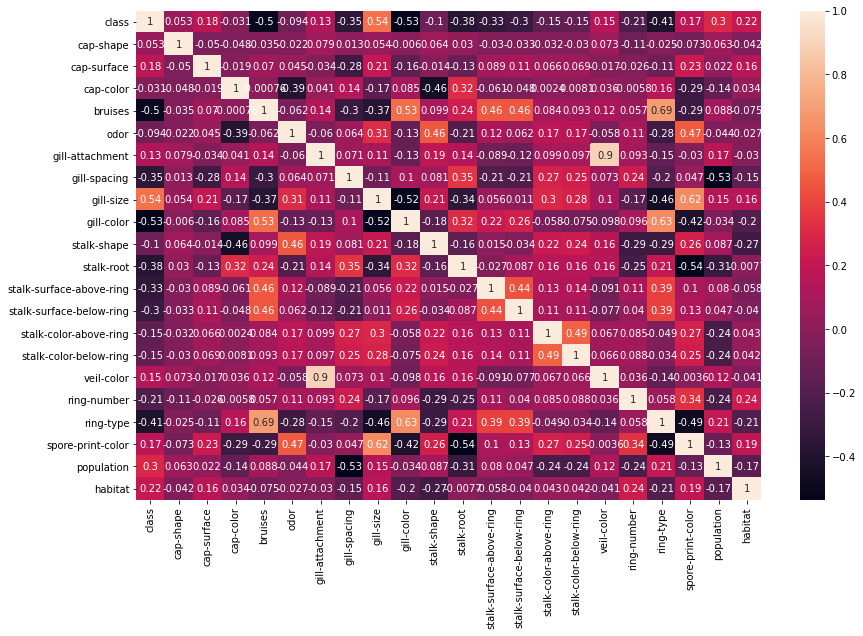

In [20]:
plt.figure(figsize=(14,9))
sns.heatmap(df.corr(),annot=True)

In [21]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_new=df.loc[(z_score<3).all(axis=1)]
print(df_new.shape)

(8124, 22)
(6568, 22)


In [22]:
df_new.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [23]:
x=df_new.drop(columns=['class'])
y=pd.DataFrame(df_new['class'])

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=44)

In [25]:
print('x_train.shape=',x_train.shape)
print('x_test.shape=',x_test.shape)
print('y_train.shape=',y_train.shape)
print('y_test.shape=',y_test.shape)

x_train.shape= (4926, 21)
x_test.shape= (1642, 21)
y_train.shape= (4926, 1)
y_test.shape= (1642, 1)


In [26]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
lg.score(x_train,y_train)
predlg=lg.predict(x_test)
print('accuracyscore:',accuracy_score(y_test,predlg))
print('\n')
print(confusion_matrix(y_test,predlg))
print('\n')
print(classification_report(y_test,predlg))

accuracyscore: 0.96163215590743


[[829  33]
 [ 30 750]]


              precision    recall  f1-score   support

           0       0.97      0.96      0.96       862
           1       0.96      0.96      0.96       780

    accuracy                           0.96      1642
   macro avg       0.96      0.96      0.96      1642
weighted avg       0.96      0.96      0.96      1642



In [27]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print('accuracyscore:',accuracy_score(y_test,preddtc))
print('\n')
print(confusion_matrix(y_test,preddtc))
print('\n')
print(classification_report(y_test,preddtc))

accuracyscore: 1.0


[[862   0]
 [  0 780]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       862
           1       1.00      1.00      1.00       780

    accuracy                           1.00      1642
   macro avg       1.00      1.00      1.00      1642
weighted avg       1.00      1.00      1.00      1642



In [28]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print('accuracyscoe:',accuracy_score(y_test,predknn))
print('\n')
print(confusion_matrix(y_test,predknn))
print('\n')
print(classification_report(y_test,predknn))

accuracyscoe: 0.9987819732034104


[[862   0]
 [  2 778]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       862
           1       1.00      1.00      1.00       780

    accuracy                           1.00      1642
   macro avg       1.00      1.00      1.00      1642
weighted avg       1.00      1.00      1.00      1642



In [29]:
svc=SVC()    

svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print('accuracyscoe:',accuracy_score(y_test,predsvc))
print('\n')
print(confusion_matrix(y_test,predsvc))
print('\n')
print(classification_report(y_test,predsvc))

accuracyscoe: 0.9957369062119367


[[862   0]
 [  7 773]]


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       862
           1       1.00      0.99      1.00       780

    accuracy                           1.00      1642
   macro avg       1.00      1.00      1.00      1642
weighted avg       1.00      1.00      1.00      1642



In [30]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print('accuracyscoe:',accuracy_score(y_test,predgnb))
print('\n')
print(confusion_matrix(y_test,predgnb))
print('\n')
print(classification_report(y_test,predgnb))

accuracyscoe: 0.8842874543239951


[[820  42]
 [148 632]]


              precision    recall  f1-score   support

           0       0.85      0.95      0.90       862
           1       0.94      0.81      0.87       780

    accuracy                           0.88      1642
   macro avg       0.89      0.88      0.88      1642
weighted avg       0.89      0.88      0.88      1642



In [31]:
import joblib
joblib.dump(dtc,'dtcfile.obj')

['dtcfile.obj']

Decision Tree Classifier performed with 100% acuuracy when compared to other models, thus, it can be used to classify mushroom models.